In [24]:
#For running matplotlib on Jupyter Notebook:
#%matplotlib notebook

#For running matplotlib on VS Code
%matplotlib ipympl  
#or use the code %matplotlib inline

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [26]:
# Combine the data into a single dataset
mouse_study = pd.merge (mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
mouse_count = mouse_study ['Mouse ID'].nunique()
mouse_count

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_duplicated = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', "Timepoint"])]
mouse_duplicated = mouse_study_duplicated["Mouse ID"].unique()

In [29]:
#Calculating the total number of duplicated Mouse ID
mouse_duplicated_count = mouse_study_duplicated["Mouse ID"].nunique()
mouse_duplicated_count

1

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
display_duplicate = mouse_study_duplicated.loc[mouse_study_duplicated.duplicated(subset=['Mouse ID'],keep=False),:]
display_duplicate1 = pd.DataFrame(display_duplicate)
display_duplicate1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
#Display the number of unique mice IDs in the data
unique_mouseid = mouse_study ["Mouse ID"].unique()
unique_mouseid

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study.loc[mouse_study["Mouse ID"]!= ("".join((mouse_duplicated))),:]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

1880

Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Assemble the resulting series into a single summary dataframe.
# mean of the tumour volume. 
mean_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"])
mean_clean_data = mean_clean_data.rename(columns={"Tumour Volume (mm3)":"Mean"})


In [35]:
# median of the tumour volume.
median_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"])
median_clean_data = median_clean_data.rename(columns={"Tumour Volume (mm3)":"Median"})


In [36]:
#variance of the tumour volume.
variance_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"])
variance_clean_data = variance_clean_data.rename(columns={"Tumour Volume (mm3)": "Variance"})


In [37]:
#standard deviation of the tumour volume.
std_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"])
std_clean_data = std_clean_data.rename(columns={"Tumour Volume (mm3)": "Standard Deviation"})


In [38]:
# SEM of the tumour volume.
sem_clean_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"])
sem_clean_data = sem_clean_data.rename(columns={"Tumour Volume (mm3)": "SEM"})

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
statistics_clean_data = mean_clean_data.join(median_clean_data).join(variance_clean_data).join(std_clean_data).join(sem_clean_data)
statistics_clean_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_table = clean_data.groupby(["Drug Regimen"]).agg({"Tumour Volume (mm3)": ['mean','median','var','std','sem']})
agg_summary_table = agg_summary_table.rename(columns={'mean': "Mean", "var":"Variance", "std": "Standard Deviation", "median": "Median", "sem": "SEM"})
agg_summary_table

Tumour Volume (mm3)                                           \
                            Mean     Median   Variance Standard Deviation   
Drug Regimen                                                                
Capomulin              40.675741  41.557809  24.947764           4.994774   
Ceftamin               52.591172  51.776157  39.290177           6.268188   
Infubinol              52.884795  51.820584  43.128684           6.567243   
Ketapril               55.235638  53.698743  68.553577           8.279709   
Naftisol               54.331565  52.509285  66.173479           8.134708   
Placebo                54.033581  52.288934  61.168083           7.821003   
Propriva               52.320930  50.446266  43.852013           6.622085   
Ramicane               40.216745  40.673236  23.486704           4.846308   
Stelasyn               54.233149  52.431737  59.450562           7.710419   
Zoniferol              53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

Bar and Pie Charts

In [41]:
#Set DataFrame for each drug regiment by using groupby
drug_regiment = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).sum()["Timepoint"])
drug_regiment =drug_regiment.reset_index()

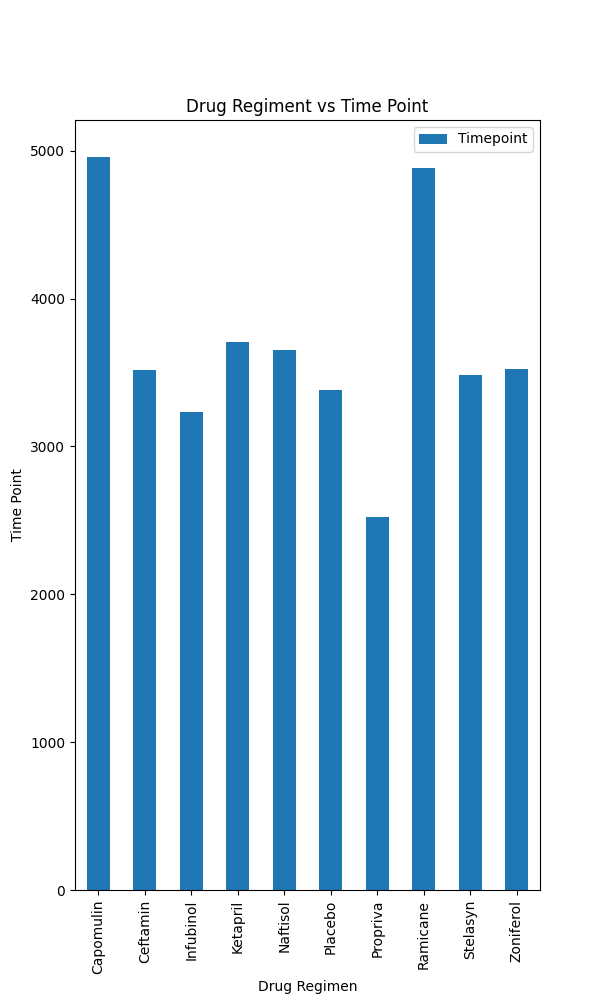

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regiment_bar =drug_regiment.plot(x = "Drug Regimen", y= "Timepoint", kind = "bar", figsize = (6,10))
drug_regiment_bar.set_xlabel ("Drug Regimen")
drug_regiment_bar.set_ylabel ("Time Point")
drug_regiment_bar.set_title ("Drug Regiment vs Time Point")
plt.show()
plt.tight_layout()

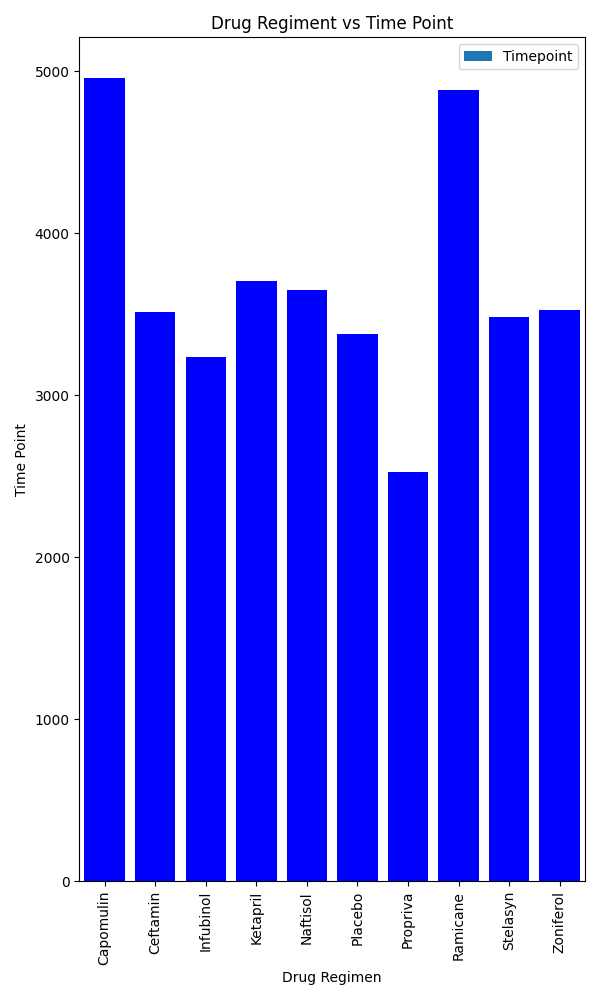

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(drug_regiment))
tick_locations = [values for values in x_axis]
plt.bar(x_axis, drug_regiment["Timepoint"], color = 'b', align = "center") #, clean_data["Timepoint"], alpha = 0.5, align="center")
plt.xticks(tick_locations, drug_regiment["Drug Regimen"])
plt.show()

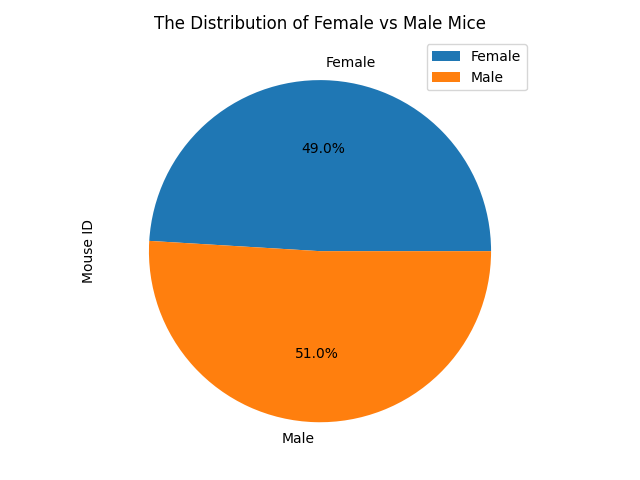

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mice = clean_data.groupby(clean_data["Sex"]).count().plot ( y="Mouse ID", kind = "pie", autopct="%1.1f%%")
gender_mice.set_title ("The Distribution of Female vs Male Mice")
plt.tight_layout()
plt.show()

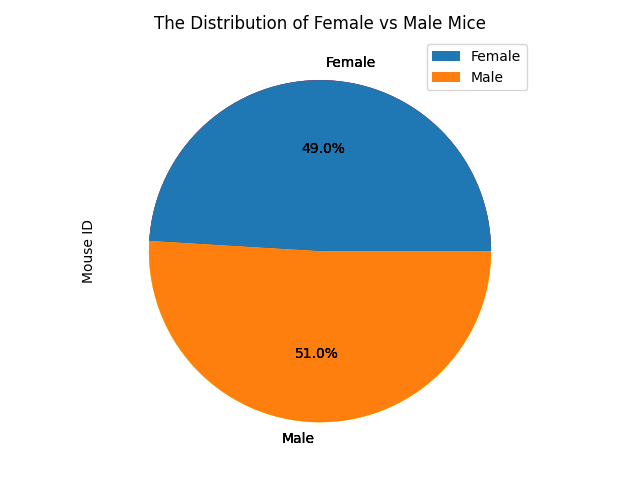

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice_plt = clean_data.groupby(clean_data["Sex"]).count()
gender_mice_plt = pd.DataFrame(gender_mice_plt, columns = ["Mouse ID"])
gender_mice_plt = gender_mice_plt.reset_index()
my_label = gender_mice_plt["Sex"]
my_value = gender_mice_plt["Mouse ID"]

plt.pie(my_value, labels= my_label, autopct='%1.1f%%')
plt.show()
        

Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_data.groupby(clean_data["Drug Regimen"])

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint